<h1>Home Credit Default Risk</h1>

<h2>Importing libraries</h2>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Removing unnecessary warnings
import warnings 
warnings.filterwarnings("ignore")

#Display plots on the notebook
%matplotlib inline

<h2>Reading data files</h2>

In [3]:
train = pd.read_csv("../ML_Exam/data/application_train.csv")
test = pd.read_csv("../ML_Exam/data/application_test.csv")

new_test = pd.read_csv("../ML_Exam/data/new_test.csv")

<h2>Data Statistics</h2>

<b>Train Data Statistics</b>

In [4]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<h2>Target Labels of Train Dataset</h2>

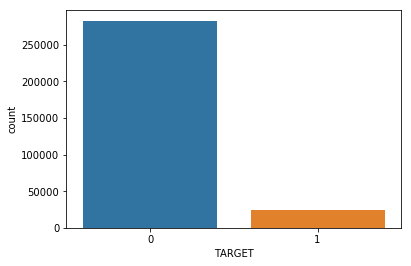

In [5]:
#Label is a binary varioble. 0 = will pay loan on time. 1 = having difficulties to repay the loan
sns.countplot(train.TARGET)

In [6]:
#Train Target value count
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<h2>Train and Test Dataset Dimensions</h2>

In [7]:
print("Train dataset dimensions: {}".format(train.shape))
print("Test dataset dimensions: {}".format(test.shape))
print("New_test dataset dimensions: {}".format(new_test.shape))

Train dataset dimensions: (307511, 122)
Test dataset dimensions: (48744, 121)
New_test dataset dimensions: (124, 121)


<h2>Test Datasets</h2>

<b>Test Dataset</b>

In [8]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<b>New_Test Dataset</b>

In [9]:
new_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<b>Both of the test datasets has all the columns as in train data set except the TARGET column</b>

<h2>Finding Missing Values and Their Columns Names</h2>

In [10]:
#This function is returning the dataframes that has missing column names and percent of missing values
def missing_columns(dataframe):
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    missing_values_perc = 100 * missing_values/len(dataframe)
    
    concat_values = pd.concat([missing_values, missing_values/len(dataframe), missing_values_perc.round(1)],axis=1)
    
    concat_values.columns = ['Missing Count', 'Missing Count Ratio', 'Missing Count %']
    
    return concat_values[concat_values.iloc[:,1] != 0]

In [11]:
#Executing Function
missing_columns(train)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,214865,0.698723,69.9
COMMONAREA_AVG,214865,0.698723,69.9
COMMONAREA_MODE,214865,0.698723,69.9
NONLIVINGAPARTMENTS_MODE,213514,0.694330,69.4
NONLIVINGAPARTMENTS_MEDI,213514,0.694330,69.4
NONLIVINGAPARTMENTS_AVG,213514,0.694330,69.4
FONDKAPREMONT_MODE,210295,0.683862,68.4
LIVINGAPARTMENTS_MEDI,210199,0.683550,68.4
LIVINGAPARTMENTS_MODE,210199,0.683550,68.4
LIVINGAPARTMENTS_AVG,210199,0.683550,68.4


In [12]:
missing_columns(test)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,33495,0.687161,68.7
COMMONAREA_AVG,33495,0.687161,68.7
COMMONAREA_MODE,33495,0.687161,68.7
NONLIVINGAPARTMENTS_MODE,33347,0.684125,68.4
NONLIVINGAPARTMENTS_MEDI,33347,0.684125,68.4
NONLIVINGAPARTMENTS_AVG,33347,0.684125,68.4
FONDKAPREMONT_MODE,32797,0.672842,67.3
LIVINGAPARTMENTS_AVG,32780,0.672493,67.2
LIVINGAPARTMENTS_MEDI,32780,0.672493,67.2
LIVINGAPARTMENTS_MODE,32780,0.672493,67.2


In [13]:
missing_columns(new_test)

,Missing Count,Missing Count Ratio,Missing Count %
OWN_CAR_AGE,89,0.717742,71.8
COMMONAREA_MEDI,88,0.709677,71.0
COMMONAREA_AVG,88,0.709677,71.0
COMMONAREA_MODE,88,0.709677,71.0
NONLIVINGAPARTMENTS_MODE,84,0.677419,67.7
LIVINGAPARTMENTS_AVG,84,0.677419,67.7
LIVINGAPARTMENTS_MEDI,84,0.677419,67.7
NONLIVINGAPARTMENTS_MEDI,84,0.677419,67.7
LIVINGAPARTMENTS_MODE,84,0.677419,67.7
NONLIVINGAPARTMENTS_AVG,84,0.677419,67.7


<h2>Checking Data Types of Datasets</h2>

In [14]:
print("Train Dataset: \n{}".format(train.dtypes.value_counts()))
print()
print("Test Dataset: \n{}".format(test.dtypes.value_counts()))
print()
print("New Test Dataset: \n{}".format(new_test.dtypes.value_counts()))
print()

Train Dataset: 
float64    65
int64      41
object     16
dtype: int64
()
Test Dataset: 
float64    65
int64      40
object     16
dtype: int64
()
New Test Dataset: 
float64    61
int64      44
object     16
dtype: int64
()


<h2>Converting Test Dataset Column Datatyps Similar to Train Dataset </h2>

In [15]:
#This function converts dataframe to match columns in accordance with the training dataframe
def convert_dtypes(training_df, testing_df, target_name='TARGET'):
    for column_name in training_df.drop([target_name],axis=1).columns:
        testing_df[column_name]= testing_df[column_name].astype(train[column_name].dtype)
    
    return testing_df

In [16]:
new_test = convert_dtypes(train,new_test)

In [17]:
print("Train Dataset: \n{}".format(train.dtypes.value_counts()))
print()
print("Test Dataset: \n{}".format(test.dtypes.value_counts()))
print()
print("New Test Dataset: \n{}".format(new_test.dtypes.value_counts()))
print()

Train Dataset: 
float64    65
int64      41
object     16
dtype: int64
()
Test Dataset: 
float64    65
int64      40
object     16
dtype: int64
()
New Test Dataset: 
float64    65
int64      40
object     16
dtype: int64
()


<b>New test dataset converted exacrtly like train dataset</b>

<h1>Finding Different Classes in Categorichal Columns

<b>Train Dataset

In [18]:
train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

<b>Test Dataset

In [19]:
test.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

<b>New Test Dataset

In [20]:
new_test.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                5
NAME_INCOME_TYPE               4
NAME_EDUCATION_TYPE            3
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              4
OCCUPATION_TYPE               16
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             32
FONDKAPREMONT_MODE             3
HOUSETYPE_MODE                 1
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

<h2>Categorical Variable Handling

<b>Label Encoding

In [21]:
# Label encode object creation to have less than or equal to 2 unique values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transform_counter = 0

#Going through all categorical column
for col in train.select_dtypes('object').columns:
    #selecting columns that have only less than or equest to 2 unique values.
    if pd.Series.nunique(train[col]) <= 2:
        train[col] = le.fit_transform(train[col].astype(str))
        test[col] = le.fit_transform(test[col].astype(str))
        new_test[col] = le.fit_transform(new_test[col].astype(str))
        
        transform_counter+=1

print("Label Encoded {} columns.".format(transform_counter))

Label Encoded 4 columns.


<b>One-hot Encoding

In [22]:
#This encoding method adding more columns
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)
new_test = pd.get_dummies(new_test,drop_first=True)

In [23]:
#Column check
print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)
print('New Testing shape: ',new_test.shape)

('Training shape: ', (307511, 230))
('Testing shape: ', (48744, 226))
('New Testing shape: ', (124, 186))


<b>The column count is not matching. It is possible to fix using aligning

In [24]:
#Target labels collecting
target = train['TARGET']

<h2>Aligning Test and Train Data to get same number of columns

In [25]:
train, test = train.align(test, axis=1, join='inner')

In [26]:
#Adding the stored target data to train dataset
train['TARGET'] = target

In [27]:
#This function adding the missing columns to test dataset and set them to 0
def match_cols(training_set, testing_set, target_label='TARGET'):
    
    for column in training_set.drop([target_label],axis=1).columns:
        if column not in testing_set.columns:
            testing_set[column]=0
    return testing_set

In [28]:
#Executing function and checking new test column numbers
new_test=match_cols(train,new_test)
new_test.shape

(124, 226)

<b>Printing Dataset Shapes

In [29]:
print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)
print('New Testing shape: ',new_test.shape)

('Training shape: ', (307511, 227))
('Testing shape: ', (48744, 226))
('New Testing shape: ', (124, 226))


<h2>Analyzing Anomalies in The Dataset

<b>Age of the Clients

In [30]:
(train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Text(0.5,0,'Age of the Clients in Years')

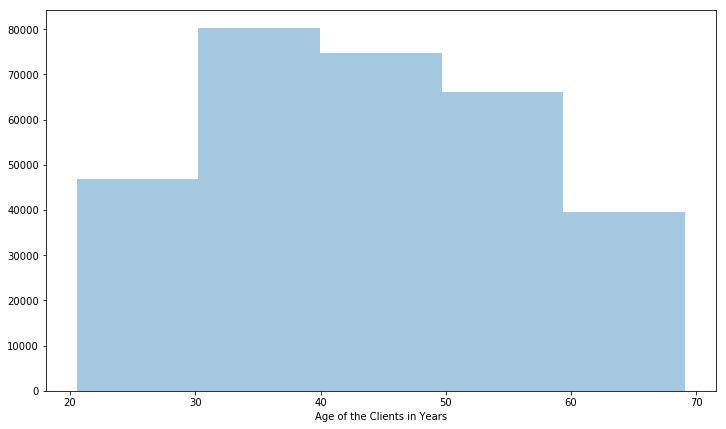

In [31]:
#Graphing the result
fig, ax = plt.subplots(figsize =(12,7))
sns.distplot(train['DAYS_BIRTH']/-365,bins=5, kde=False)
plt.xlabel("Age of the Clients in Years")

<b>Employed Time in Years

In [32]:
(train['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

The max years of employment is 1000 years. It is an anomaly in this dataset. 

Text(0.5,0,"Before the loan application the client's employed time in years ")

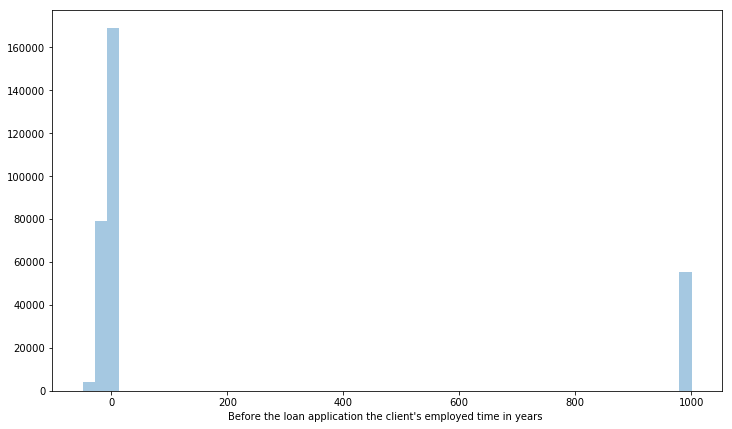

In [33]:
#Graphing the result
fig, ax = plt.subplots(figsize =(12,7))
sns.distplot(train['DAYS_EMPLOYED']/365, kde=False)
plt.xlabel("Before the loan application the client's employed time in years ")

In [34]:
#Counting anomalies in this section
thou_anomalies = train[(train['DAYS_EMPLOYED']/365>=900) & (train['DAYS_EMPLOYED']/365<=1100)]
len(thou_anomalies)

55374

<b>Checking the ability to repay of those anomalies

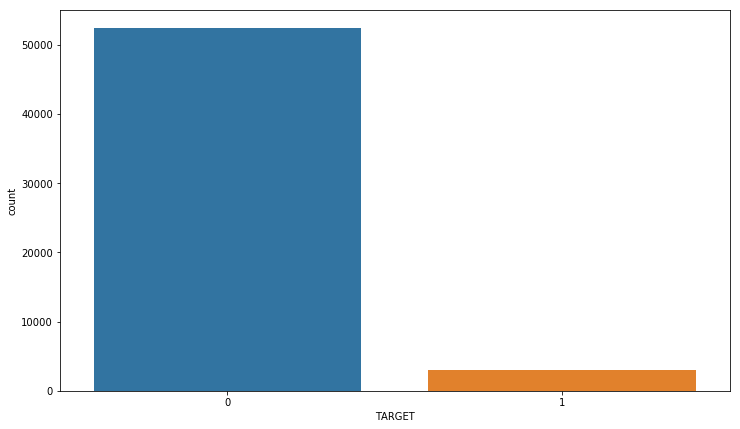

In [35]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='TARGET',data=thou_anomalies)

In [36]:
#Index of non anomalies and anomalies
ano_index = pd.Index(thou_anomalies.index)
nonano_index = train.index.difference(ano_index)

In [37]:
#records of anomalies
non_ano = train.iloc[nonano_index]

In [38]:
#getting anomaly target
ano_target = thou_anomalies['TARGET'].value_counts()
non_ano_target = non_ano['TARGET'].value_counts()

In [39]:
#default rate for anomalies and non anomalies
print("Anomalies default rate {}%".format(100*ano_target[1]/(ano_target[1]+ano_target[0])))
print("Non Anomalies default rate {}%".format(100*non_ano_target[1]/(non_ano_target[1]+non_ano_target[0])))

Anomalies default rate 5%
Non Anomalies default rate 8%


<b>Anomalies have lesser rate compared to non anomalies

<h2> Fixing Anomalies

<b>The better way to fix these anomalies are to filled with NaN values

In [40]:
#Anomalous flag column creation
train['DAYS_EMPLOYED_ANOM'] = train["DAYS_EMPLOYED"] == 365243

#Replacing anomalous values with NaN
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace({365243: np.nan})

Text(0.5,0,'Years worked before application ')

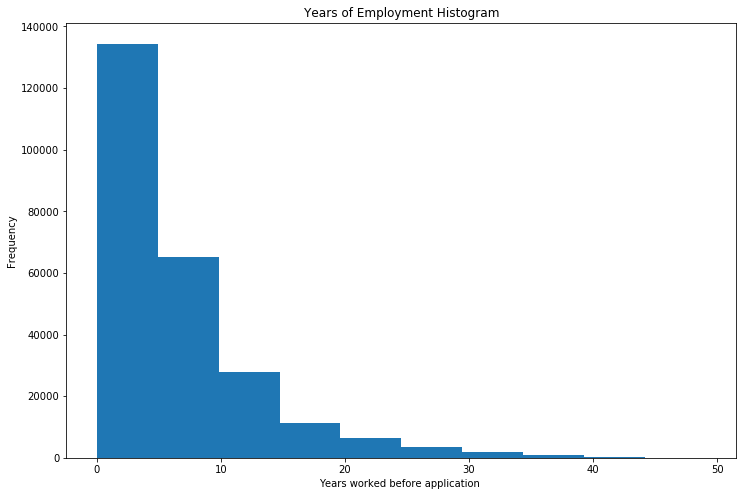

In [41]:
#Looking for anolmalies
plt.figure(figsize=(12,8))
(train['DAYS_EMPLOYED']/-365).plot.hist(title = "Years of Employment Histogram")
plt.xlabel("Years worked before application ")

<b>Fixing Test Dataset Anomalies of Employed Years

In [42]:
test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == 365243

test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].replace({365243: np.nan})

new_test['DAYS_EMPLOYED_ANOM'] = new_test["DAYS_EMPLOYED"] == 365243

new_test['DAYS_EMPLOYED'] = new_test['DAYS_EMPLOYED'].replace({365243: np.nan})

<h2>Finding The Most Correlated features for The TARGET Variable

In [44]:
corr_train = train.corr()['TARGET']

<b>Getting 10 positive and negative correlated features

In [45]:
print(corr_train.sort_values().tail(10))
corr_train.sort_values().head(10)

REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
CODE_GENDER_M                  0.054713
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
NAME_INCOME_TYPE_Pensioner             -0.046209
DAYS_EMPLOYED_ANOM                     -0.045987
ORGANIZATION_TYPE_XNA                  -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
Name: TARGET, dtype: float64

<h2>Filling the missing values for the correlated variables

In [46]:
from sklearn.preprocessing import Imputer

In [47]:
poly_fitting_vars = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH' ]

In [48]:
imputer = Imputer(missing_values='NaN', strategy='median')

c:\python27\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [49]:
train[poly_fitting_vars] = imputer.fit_transform(train[poly_fitting_vars])

In [50]:
train[poly_fitting_vars].shape

(307511, 4)

In [51]:
test[poly_fitting_vars] = imputer.transform(test[poly_fitting_vars])

In [52]:
test[poly_fitting_vars].shape

(48744, 4)

In [53]:

new_test[poly_fitting_vars] = imputer.transform(new_test[poly_fitting_vars])


In [54]:
new_test[poly_fitting_vars].shape

(124, 4)

<h2>Generating interaction variables

In [56]:
from sklearn.preprocessing import PolynomialFeatures


In [57]:
poly_feat = PolynomialFeatures(degree=4)

In [58]:
poly_interaction_train = poly_feat.fit_transform(train[poly_fitting_vars])

In [60]:
poly_interaction_train.shape

(307511L, 70L)

In [61]:
poly_interaction_test = poly_feat.fit_transform(test[poly_fitting_vars])

In [62]:
poly_interaction_test.shape

(48744L, 70L)

In [63]:
poly_interaction_new_test = poly_feat.fit_transform(new_test[poly_fitting_vars])

In [64]:
poly_interaction_new_test.shape

(124L, 70L)

<h2>Building a Dataframe using interaction variables

In [66]:
poly_interaction_train = pd.DataFrame(poly_interaction_train,columns=poly_feat.get_feature_names(poly_fitting_vars))

In [67]:
poly_interaction_train.shape

(307511, 70)

In [69]:
poly_interaction_test =  pd.DataFrame(poly_interaction_test,columns=poly_feat.get_feature_names(poly_fitting_vars))

In [80]:
poly_interaction_test.shape

(48744, 70)

In [81]:
poly_interaction_new_test =  pd.DataFrame(poly_interaction_new_test,columns=poly_feat.get_feature_names(poly_fitting_vars))

In [82]:
poly_interaction_new_test.shape

(124, 70)

<h2>Adding the 'TARGET' Column

In [83]:
poly_interaction_train['TARGET'] = train['TARGET']

In [84]:
interaction = poly_interaction_train.corr()['TARGET'].sort_values()

<h2>Most Correlated Interaction Variables

In [86]:
print(interaction.tail(15))
(interaction.head(15))

EXT_SOURCE_2^3 DAYS_BIRTH                            0.140230
EXT_SOURCE_3^2 DAYS_BIRTH                            0.141777
EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH               0.144206
EXT_SOURCE_2^2 DAYS_BIRTH                            0.149313
EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH               0.149813
EXT_SOURCE_3 DAYS_BIRTH                              0.150109
EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH                 0.151816
EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH                 0.155891
EXT_SOURCE_2 DAYS_BIRTH                              0.156873
EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH               0.164466
EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH               0.168159
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH    0.174173
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH                 0.181283
TARGET                                               1.000000
1                                                         NaN
Name: TARGET, dtype: float64


EXT_SOURCE_3 EXT_SOURCE_2                  -0.193939
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1     -0.189605
EXT_SOURCE_3 EXT_SOURCE_2^2                -0.176428
EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1   -0.174534
EXT_SOURCE_3^2 EXT_SOURCE_2                -0.172282
EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1   -0.170938
EXT_SOURCE_2 EXT_SOURCE_1                  -0.166625
EXT_SOURCE_3 EXT_SOURCE_1                  -0.164065
EXT_SOURCE_3^2 EXT_SOURCE_2^2              -0.162923
EXT_SOURCE_3 EXT_SOURCE_2^3                -0.161994
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2   -0.160677
EXT_SOURCE_2                               -0.160295
EXT_SOURCE_2^2 EXT_SOURCE_1                -0.156867
EXT_SOURCE_3                               -0.155892
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2     -0.154886
Name: TARGET, dtype: float64

<h1>Getting the Names of Columns which Have Highest Correlation - 1 & TARGET Can be Dropped

In [87]:
set(interaction.head(15).index).union(interaction.tail(15).index).difference(set({'1','TARGET'}))

{'EXT_SOURCE_2',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^3 DAYS_BIRTH',
 'EXT_SOURCE_3',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2',
 'EXT_SOURCE_3 EXT_SOURCE_2^2',
 'EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_2',
 'EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3^2 EXT_SOURCE_2^2'

<h2>Selecting the columns which have highest correlation to 'TARGET'. Columns '1' and 'TARGET' are not necessary

In [88]:
selected_inter_variables = list(set(interaction.head(15).index).union(interaction.tail(15).index).difference(set({'1','TARGET'})))

In [89]:
# look at the selected features
poly_interaction_train[selected_inter_variables].head()

,EXT_SOURCE_3^2 EXT_SOURCE_2,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH,...,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2,EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH
0,0.005108,-91.172960,0.001343,0.009637,0.002534,0.005741,3.280441e+06,0.000424,-28.791659,-54.318807,...,-48.326185,0.021834,0.011573,0.036649,-1318.634256,0.003043,0.000800,-346.733022,-109.495390,-206.575767
1,0.178286,-3474.605044,0.110938,0.207254,0.128963,0.120520,9.361535e+07,0.055495,-1738.108981,-2020.509913,...,-2988.969365,0.193685,0.166614,0.333073,-8973.906339,0.103675,0.064511,-5583.975307,-2793.283699,-3247.125160
2,0.295894,-4294.187521,0.164491,0.225464,0.125338,0.156373,1.471224e+08,0.149722,-3908.621640,-2978.274675,...,-5635.596478,0.281290,0.369159,0.405575,-13895.327191,0.205220,0.114084,-7724.580288,-7031.006802,-5357.456268
3,0.186365,-4303.904125,0.121220,0.226462,0.147300,0.214075,1.257541e+08,0.094300,-3348.134986,-4068.490949,...,-3541.866544,0.329122,0.270849,0.348166,-10172.925140,0.176171,0.114589,-6616.894625,-5147.479068,-6254.966447
4,0.092471,-1111.296208,0.029844,0.055754,0.017994,0.052705,6.863256e+07,0.046790,-1742.320648,-1050.510985,...,-1843.135727,0.163305,0.270849,0.172754,-10669.126224,0.087413,0.028212,-3443.335521,-5398.555790,-3254.993372


In [90]:
poly_interaction_test[selected_inter_variables].head()

,EXT_SOURCE_3^2 EXT_SOURCE_2,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH,...,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2,EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH
0,0.020094,-1913.883926,0.015867,0.099469,0.078546,0.469296,4.663438e+07,0.015123,-1824.110478,-9029.719944,...,-386.627243,0.594305,0.120057,0.125965,-3069.315478,0.094803,0.074862,-2423.698322,-2310.011305,-11435.028416
1,0.054673,-665.278990,0.015946,0.036829,0.010741,0.048060,4.120477e+07,0.030889,-1288.767295,-868.151015,...,-987.604448,0.164783,0.244619,0.126276,-7821.019554,0.071345,0.020808,-2281.043619,-4418.799416,-2976.631403
2,0.261238,-5995.438444,0.182811,0.299203,0.209379,0.247788,1.716760e+08,0.132186,-4335.147954,-4965.175946,...,-5234.681105,0.354091,0.309160,0.427564,-12243.044232,0.216346,0.151396,-8567.521115,-6194.955045,-7095.269204
3,0.191336,-2224.456866,0.097520,0.159163,0.081122,0.136570,6.099746e+07,0.100592,-2294.536289,-1908.706472,...,-2674.113111,0.267955,0.322119,0.312281,-8563.154516,0.164177,0.083677,-4364.443591,-4501.941285,-3744.932912
4,0.121968,-1264.843931,0.051920,0.096997,0.041290,0.036631,3.874573e+07,0.024655,-600.633070,-477.663386,...,-1590.465410,0.086051,0.108203,0.227860,-6980.002306,0.046061,0.019608,-2971.298294,-1410.972511,-1122.099233


In [91]:
poly_interaction_new_test[selected_inter_variables].head()

,EXT_SOURCE_3^2 EXT_SOURCE_2,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH,...,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2,EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH
0,0.005108,-91.172960,0.001343,0.009637,0.002534,0.005741,3.280441e+06,0.000424,-28.791658,-54.318807,...,-48.326185,0.021834,0.011573,0.036649,-1318.634255,0.003043,0.000800,-346.733022,-109.495389,-206.575766
1,0.178286,-3474.605041,0.110938,0.207254,0.128963,0.120520,9.361535e+07,0.055495,-1738.108978,-2020.509909,...,-2988.969364,0.193685,0.166614,0.333073,-8973.906339,0.103675,0.064511,-5583.975305,-2793.283695,-3247.125155
2,0.295894,-4294.187517,0.164491,0.225464,0.125338,0.156373,1.471224e+08,0.149722,-3908.621639,-2978.274671,...,-5635.596479,0.281290,0.369159,0.405575,-13895.327197,0.205220,0.114084,-7724.580286,-7031.006805,-5357.456264
3,0.186365,-4303.904119,0.121220,0.226462,0.147300,0.214075,1.257541e+08,0.094300,-3348.134984,-4068.490944,...,-3541.866542,0.329122,0.270849,0.348166,-10172.925140,0.176171,0.114589,-6616.894620,-5147.479068,-6254.966443
4,0.092471,-1111.296208,0.029844,0.055754,0.017994,0.052705,6.863256e+07,0.046790,-1742.320648,-1050.510985,...,-1843.135727,0.163305,0.270849,0.172754,-10669.126224,0.087413,0.028212,-3443.335521,-5398.555790,-3254.993373


<h2>List of unselected columns that possible to drop

In [92]:
unselected_cols = [element for element in poly_interaction_train.columns if element not in selected_inter_variables]

<h2>Dropping unselected columns of train and test data

In [93]:
poly_interaction_train = poly_interaction_train.drop(unselected_cols,axis=1)

In [94]:
poly_interaction_test = poly_interaction_test.drop(list(set(unselected_cols).difference({'TARGET'})),axis=1)

In [95]:
poly_interaction_new_test = poly_interaction_new_test.drop(list(set(unselected_cols).difference({'TARGET'})),axis=1)

<h2> Merging polynomial feature into original dataset

In [96]:
train = train.join(poly_interaction_train.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

In [97]:
test = test.join(poly_interaction_test.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

In [98]:
new_test = new_test.join(poly_interaction_new_test.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

<h2>Merged dataframe dimensions

In [99]:
print("The train dataset dimensions: {}".format(train.shape))
print("The test dataset dimensions: {}".format(test.shape))
print("The new test dataset dimensions: {}".format(new_test.shape))


The train dataset dimensions: (307511, 254)
The test dataset dimensions: (48744, 253)
The new test dataset dimensions: (124, 253)


<h2>Preparing the Dataset for Creating the Machine Learning Model

<h2>Feature Imputing

In [100]:
from sklearn.preprocessing import MinMaxScaler, Imputer

In [101]:
features = list(set(train.columns).difference({'TARGET'}))

In [102]:
imputer = Imputer(strategy="median")

c:\python27\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


<h2>Feature Scaling

In [103]:
new_test = new_test.replace(to_replace=np.inf,value=0)

In [104]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [105]:
imputer.fit(train.drop(['TARGET'],axis=1))

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [106]:
train_transformed = imputer.transform(train.drop(['TARGET'],axis=1))

In [107]:
test_transformed = imputer.transform(test)

In [108]:
new_test_transformed = imputer.transform(new_test)

In [109]:
train_transformed = scaler.fit_transform(train_transformed)

In [110]:
test_transformed = scaler.transform(test_transformed)

In [111]:
new_test_transformed = scaler.transform(new_test_transformed)

In [112]:
print("The train dataset dimensions: {}".format(train_transformed.shape))
print("The test dataset dimensions: {}".format(test_transformed.shape))
print("The new test dataset dimensions: {}".format(new_test_transformed.shape))

The train dataset dimensions: (307511L, 253L)
The test dataset dimensions: (48744L, 253L)
The new test dataset dimensions: (124L, 253L)


<h2>Splitting Dataset into Training and Validation Set

In [115]:
from sklearn.model_selection import train_test_split

X_training_set, X_validation_set, y_training_set, y_validation_set = train_test_split(train_transformed, target, test_size=0.33, random_state=42)

<h1>Creating the Model

<h2>Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(C = 2)

In [117]:
logistic_regressor.fit(X_training_set,y_training_set)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
log_regression_pred = logistic_regressor.predict(X_validation_set)

In [119]:
logistic_new = logistic_regressor.predict(new_test_transformed)

In [120]:
pd.DataFrame({'target':logistic_new})['target'].value_counts()

0    124
Name: target, dtype: int64

<h1>Accuracy Metrics with AUROC

In [121]:
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,log_regression_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,log_regression_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,log_regression_pred))

('The accuracy in general is : ', 0.9200130076173395)


('The classification report is as follows:\n', u'              precision    recall  f1-score   support\n\n           0       0.92      1.00      0.96     93362\n           1       0.50      0.01      0.02      8117\n\n   micro avg       0.92      0.92      0.92    101479\n   macro avg       0.71      0.50      0.49    101479\nweighted avg       0.89      0.92      0.88    101479\n')
('ROC AUC score is: ', 0.5034871041311515)


In [122]:
log_regression_pred_test = logistic_regressor.predict_proba(test_transformed)

In [123]:
# selecting the second column
log_regression_pred_test[:,1]

array([0.05342986, 0.20067074, 0.04960973, ..., 0.0489945 , 0.05287354,
       0.12652108])

In [124]:
submission_log_regression = test[['SK_ID_CURR']]
submission_log_regression['TARGET'] = log_regression_pred_test[:,1]

In [125]:
submission_log_regression.head(10)

,SK_ID_CURR,TARGET
0,100001,0.053430
1,100005,0.200671
2,100013,0.049610
3,100028,0.036040
4,100038,0.118125
5,100042,0.021865
6,100057,0.018965
7,100065,0.099981
8,100066,0.013653
9,100067,0.103332


In [126]:
submission_log_regression.to_csv("log_regression.csv",index=False)